In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [335]:
in_path = "/Users/Paul/research/files/analysis/devries_sweep_fix.csv"
df = pd.read_csv(in_path)

In [336]:
df.iloc[-1]


Unnamed: 0     10                                         
name           devries_model_bbvgg16_do1_run1_ne250_apTrue
study          new_class_study_svhn_proposed_mode         
model          devries_model                              
network        vgg16                                      
fold           0                                          
confid         mcd_waic                                   
n_test         33509                                      
accuracy       0.25298                                    
nll            NaN                                        
brier_score    NaN                                        
failauc        0.94754                                    
failap_suc     0.91376                                    
failap_err     0.97466                                    
mce            0.68543                                    
ece            0.43485                                    
e-aurc         29.1139                                  

In [337]:
len(df)

3965

In [338]:
df.groupby("study").count()
df = df.drop(df[df.model=="mcd_sv"].index)
print(len(df))

3965


In [339]:
df_clean = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])

In [340]:
len(df_clean)

2911

In [341]:
df_clean.groupby("name").count()


,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr
name,,,,,,,,,,,,,,,,,,
devries_model_bbvgg13_do0_run0,15,15,15,15,15,15,15,15,3,3,15,15,15,15,15,15,15,15
devries_model_bbvgg13_do0_run0_ne200,27,27,27,27,27,27,27,27,3,3,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run0_ne250,27,27,27,27,27,27,27,27,3,3,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run0_noreflect_relulfirst,15,15,15,15,15,15,15,15,3,3,15,15,15,15,15,15,15,15
devries_model_bbvgg13_do0_run0_reflect_relulast,15,15,15,15,15,15,15,15,3,3,15,15,15,15,15,15,15,15
devries_model_bbvgg13_do0_run1,15,15,15,15,15,15,15,15,3,3,15,15,15,15,15,15,15,15
devries_model_bbvgg13_do0_run1_ne200,27,27,27,27,27,27,27,27,3,3,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run1_ne250,27,27,27,27,27,27,27,27,3,3,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run1_noreflect_relulfirst,15,15,15,15,15,15,15,15,3,3,15,15,15,15,15,15,15,15


In [342]:
df_clean[df_clean.name=="det_devries_bbvgg16_doTrue_normTrue_schedCosineAnnealing"]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr


In [392]:
df = df_clean

In [393]:
df = df.dropna(subset=["name"])

In [394]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)
#df[(df.study.str.contains("tinyimagenet_resize_original")) & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="failauc", ascending=False)

<ipython-input-394-6bbc6dd86d9c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [395]:
df = df[df.name.str.contains("ne2") ]
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
# df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0] if "run" in row["name"] else "-1", axis=1)
# df["relu"] = df.apply(lambda row: "last" if ("last" in row["name"] or row["backbone"]=="vgg") else "first", axis=1)
# df["reflect"] = df.apply(lambda row: False if ("noreflect" in row["name"] or row["backbone"]=="vgg") else True, axis=1)
df["ne"] = df.apply(lambda row: row["name"].split("ne")[1].split("_")[0], axis=1)
df["ap"] = df.apply(lambda row: False if "apFalse" in row["name"] else True, axis=1)


# df["ms"] = df.apply(lambda row: False if "msFalse" in row["name"] else True, axis=1)
# df.backbone.tolist()

In [396]:
import numpy as np
dfg = df.groupby(by=["study", "backbone", "ne", "dropout", "ap", "confid"]).mean().reset_index()
dfg_std = df.groupby(by=["study", "backbone", "ne", "dropout", "ap", "confid"]).std().reset_index()
rename_dict = {k:"{}_std".format(k) for k in dfg.columns if k not in ["study", "backbone", "ne", "dropout", "ap", "confid"] }
dfg_std = dfg_std.rename(columns=rename_dict)
print(len(df), len(dfg), len(dfg_std))
print(dfg_std.columns)
print(rename_dict)

2700 900 900
Index(['study', 'backbone', 'ne', 'dropout', 'ap', 'confid', 'Unnamed: 0_std',
       'fold_std', 'n_test_std', 'accuracy_std', 'nll_std', 'brier_score_std',
       'failauc_std', 'failap_suc_std', 'failap_err_std', 'mce_std', 'ece_std',
       'e-aurc_std', 'aurc_std', 'fpr@95tpr_std'],
      dtype='object')
{'Unnamed: 0': 'Unnamed: 0_std', 'fold': 'fold_std', 'n_test': 'n_test_std', 'accuracy': 'accuracy_std', 'nll': 'nll_std', 'brier_score': 'brier_score_std', 'failauc': 'failauc_std', 'failap_suc': 'failap_suc_std', 'failap_err': 'failap_err_std', 'mce': 'mce_std', 'ece': 'ece_std', 'e-aurc': 'e-aurc_std', 'aurc': 'aurc_std', 'fpr@95tpr': 'fpr@95tpr_std'}


In [421]:
study= "new_class_study_cifar100_proposed_mode"
data =  dfg[(dfg.study == study)]
data_std =  dfg_std[(dfg_std.study == study)]
# data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]

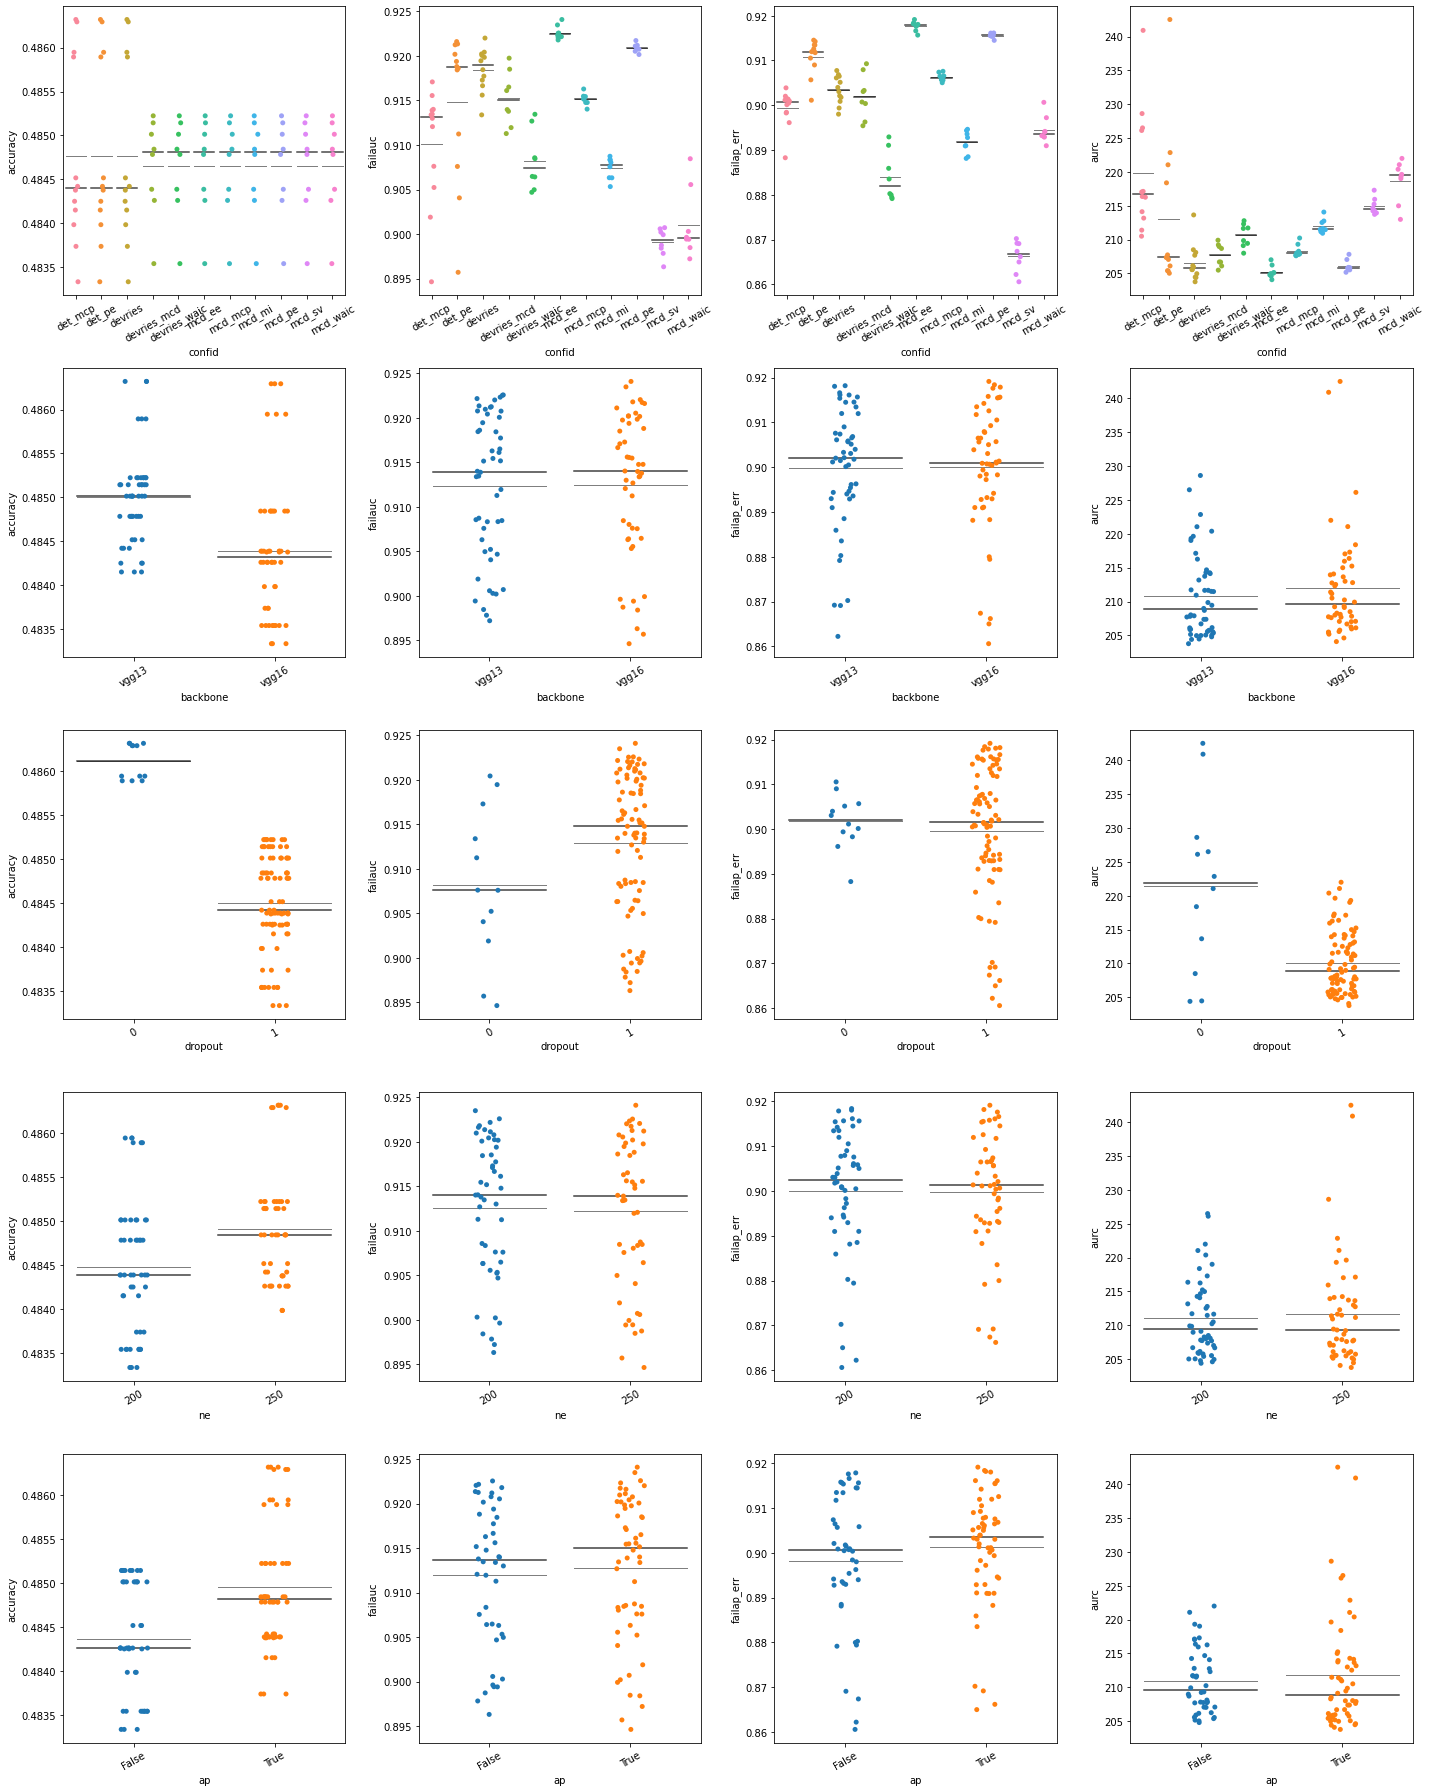

In [422]:
plot_data = data
dims = ["confid", "backbone", "dropout", "ne", "ap"]
metrics = ["accuracy", "failauc", "failap_err", "aurc"]
scale = 5
f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=plot_data)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=30)

plt.tight_layout()

In [423]:
std_columns = [c for c in data_std.columns if "std"in c]
for s in std_columns:
    data[s] = data_std[s]

print(data.columns)
print(data_std.columns)
print(len(data))
data[["backbone", "ne", "ap", "dropout", "confid", "failauc", "failauc_std", "aurc", "aurc_std", "failap_suc", "accuracy", "accuracy_std"]].sort_values(by="aurc", ascending=True)

Index(['study', 'backbone', 'ne', 'dropout', 'ap', 'confid', 'Unnamed: 0',
       'fold', 'n_test', 'accuracy', 'nll', 'brier_score', 'failauc',
       'failap_suc', 'failap_err', 'mce', 'ece', 'e-aurc', 'aurc', 'fpr@95tpr',
       'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std', 'nll_std',
       'brier_score_std', 'failauc_std', 'failap_suc_std', 'failap_err_std',
       'mce_std', 'ece_std', 'e-aurc_std', 'aurc_std', 'fpr@95tpr_std'],
      dtype='object')
Index(['study', 'backbone', 'ne', 'dropout', 'ap', 'confid', 'Unnamed: 0_std',
       'fold_std', 'n_test_std', 'accuracy_std', 'nll_std', 'brier_score_std',
       'failauc_std', 'failap_suc_std', 'failap_err_std', 'mce_std', 'ece_std',
       'e-aurc_std', 'aurc_std', 'fpr@95tpr_std'],
      dtype='object')
100


<ipython-input-423-97c2e6ee3129>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[s] = data_std[s]


,backbone,ne,ap,dropout,confid,failauc,failauc_std,aurc,aurc_std,failap_suc,accuracy,accuracy_std
241,vgg13,250,True,1,devries,0.922013,0.001981,203.771073,1.028485,0.929747,0.484420,0.000576
294,vgg16,250,True,1,mcd_ee,0.924097,0.001140,204.077313,1.072039,0.927537,0.484843,0.000267
202,vgg13,200,True,0,devries,0.920430,0.001028,204.396927,1.189242,0.926583,0.485893,0.000404
227,vgg13,250,True,0,devries,0.919460,0.002350,204.462150,1.316737,0.926090,0.486320,0.000165
269,vgg16,200,True,1,mcd_ee,0.923487,0.001254,204.613620,0.493944,0.927167,0.484387,0.000371
208,vgg13,200,False,1,mcd_ee,0.922170,0.000347,204.783533,0.463681,0.926230,0.485013,0.000315
216,vgg13,200,True,1,devries,0.920067,0.001370,204.962703,0.560606,0.928020,0.484150,0.000411
244,vgg13,250,True,1,mcd_ee,0.922327,0.002714,204.977947,1.353732,0.925403,0.485223,0.000605
204,vgg13,200,False,1,det_pe,0.921353,0.000902,205.029863,0.684370,0.927273,0.484250,0.000773
219,vgg13,200,True,1,mcd_ee,0.922577,0.001309,205.048383,0.805066,0.925830,0.484783,0.000215


In [317]:
df[(df.study == "iid_study") & (df.dropout == "1")]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,backbone,dropout,ne
711,2.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,devries,9000.0,0.94633,0.01911,0.08465,0.93482,0.99582,0.40478,0.52296,0.10234,4.00611,5.47264,0.43478,vgg13,1,200_apTrue
722,2.0,devries_model_bbvgg13_do1_run1_ne200_apFalse,iid_study,devries,vgg13,0.0,devries,9000.0,0.94644,0.01862,0.08293,0.94471,0.99650,0.43908,0.47436,0.09531,3.34909,4.80950,0.35477,vgg13,1,200_apFalse
821,2.0,devries_model_bbvgg13_do1_run0_ne200_apTrue,iid_study,devries,vgg13,0.0,devries,9000.0,0.94544,0.01987,0.08587,0.94085,0.99613,0.45759,0.62027,0.09214,3.70330,5.21928,0.35234,vgg13,1,200_apTrue
832,2.0,devries_model_bbvgg13_do1_run0_ne200_apFalse,iid_study,devries,vgg13,0.0,devries,9000.0,0.94767,0.01932,0.08327,0.93815,0.99615,0.42997,0.47489,0.09149,3.68783,5.08175,0.35456,vgg13,1,200_apFalse
931,2.0,devries_model_bbvgg16_do1_run0_ne200_apTrue,iid_study,devries,vgg16,0.0,devries,9000.0,0.94544,0.02059,0.08868,0.94148,0.99607,0.43340,0.57461,0.10055,3.75601,5.27199,0.37678,vgg16,1,200_apTrue
953,2.0,devries_model_bbvgg16_do1_run0_ne200_apFalse,iid_study,devries,vgg16,0.0,devries,9000.0,0.94522,0.02059,0.08809,0.93810,0.99596,0.45929,0.52243,0.09414,3.86376,5.39223,0.35294,vgg16,1,200_apFalse
1008,2.0,devries_model_bbvgg16_do1_run1_ne200_apTrue,iid_study,devries,vgg16,0.0,devries,9000.0,0.94744,0.02016,0.08527,0.93918,0.99588,0.43225,0.57020,0.09586,3.94262,5.34851,0.34249,vgg16,1,200_apTrue
1030,2.0,devries_model_bbvgg16_do1_run1_ne200_apFalse,iid_study,devries,vgg16,0.0,devries,9000.0,0.94722,0.01986,0.08525,0.93986,0.99612,0.42640,0.52135,0.09090,3.72028,5.13819,0.34526,vgg16,1,200_apFalse
1151,2.0,devries_model_bbvgg13_do1_run0_ne250_apTrue,iid_study,devries,vgg13,0.0,devries,9000.0,0.95000,0.01932,0.08197,0.93354,0.99605,0.40435,0.51759,0.10399,3.79032,5.06169,0.40000,vgg13,1,250_apTrue
1206,2.0,devries_model_bbvgg13_do1_run1_ne250_apTrue,iid_study,devries,vgg13,0.0,devries,9000.0,0.94689,0.02008,0.08639,0.93591,0.99608,0.39172,0.48454,0.10054,3.75699,5.19304,0.41632,vgg13,1,250_apTrue


In [327]:
import numpy as np
np.std([0.95000, 0.94633, 1])
np.std([95.000, 94.633], ddof=1)

0.25950818869546605